# **ÉVALUATION UA1 : Prétraitement des Données avec Pipelines**
### Dataset : **Données sur les maladies cardiaques de l’UCI**

**Objectif :**

L’objectif de cette évaluation est d’appliquer les techniques de prétraitement des données vues en cours sur le jeu de données UCI Heart Disease Data provenant de Kaggle. Les étudiants doivent justifier le choix de chaque méthode utilisée..


## Partie 1 : Exploration des données

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
# Chargement des données
df = pd.read_csv("heart_disease_uci.csv")
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Description des variables
| Variable | Description |
|---|---|
| id | (Identifiant unique pour chaque patient) |
| age | (Âge du patient en années) |
| origin | (lieu d’étude) |
| sex | (Homme/Femme) |
| cp | Douleur thoracique ([Angine typique, angine atypique, non anginale, asymptomatique]) |
| trestbps | tension artérielle au repos (tension artérielle au repos (en mm Hg à l’hospitalisation)) |
| chol | (cholestérol sérique en mg/dl) |
| fbs | (si la glycémie à jeun > 120 mg/dl) |
| restecg | (résultats électrocardiographiques au repos) -- Valeurs : [normale, anomalie STT, hypertrophie LV] |
| thalach | fréquence cardiaque maximale atteinte |
| exang | angine induite par l’exercice (Vrai/Faux) |
| oldpeak | Dépression ST induite par l’exercice par rapport au repos |
| slope | la pente du segment ST d’exercice de pointe |
| ca | nombre de vaisseaux majeurs (0-3) colorés par fluoroscopie |
| thal | [normal ; défaut fixe ; défaut réversible] |
| num | l’attribut prédit |

In [3]:
# Dimensions du Dataset
df.shape

(920, 16)

In [4]:
# Informations sur le Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Vérification des valeurs manquantes
miss = df.isnull().sum()
print('\nValeurs manquantes par colonne :')
print(miss)


Valeurs manquantes par colonne :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
# Vérification des doublons
dbl = df.duplicated().sum()
print('\nNombre de doublons exacts :', dbl)


Nombre de doublons exacts : 0


## Partie 2 : identifier les colonnes numriques et categorielles

In [7]:
# Identification des types de colonnes
# Numériques : Variables mesurables ou dénombraires
cols_num = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Catégorielles Nominales (Pas d'ordre)
cols_cat_nom = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'thal']

# Catégorielles Ordinales (Il existe un ordre logique)
cols_cat_ord = ['slope']  # 'upsloping', 'flat', 'downsloping'

print(f"Colonnes numériques : {cols_num}")
print(f"Colonnes nominales : {cols_cat_nom}")
print(f"Colonnes ordinales : {cols_cat_ord}")

Colonnes numériques : ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Colonnes nominales : ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'thal']
Colonnes ordinales : ['slope']


## Partie 3 : Imputation

In [8]:
from sklearn.impute import SimpleImputer, KNNImputer

# --- 1. SimpleImputer ---
# Pour les numériques : on utilise la médiane (robuste aux outliers)
imputer_num = SimpleImputer(strategy='median')
df[cols_num] = imputer_num.fit_transform(df[cols_num])

# Pour les catégorielles : on utilise la valeur la plus fréquente (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
# On regroupe nominales et ordinales pour l'imputation simple
cols_cat_all = cols_cat_nom + cols_cat_ord
df[cols_cat_all] = imputer_cat.fit_transform(df[cols_cat_all])

# --- 2. KNNImputer (Comparaison) ---
# Note : KNN fonctionne sur des données numériques.
# Dans le cadre de l'exercice, appliquons-le sur une copie des colonnes numériques pour comparer.
df_knn = df[cols_num].copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=cols_num)

print("Imputation terminée.")
# Justification : KNN est souvent plus précis car il tient compte des corrélations entre variables,
# mais SimpleImputer est plus rapide et suffisant si peu de données manquent.

Imputation terminée.


## Partie 4 : Encodage

In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# 1. LabelEncoder (Sur la variable cible 'num')
le = LabelEncoder()
df['num'] = le.fit_transform(df['num'])

# 2. OrdinalEncoder (Sur 'slope')
# On définit l'ordre manuellement pour être sûr : up -> flat -> down (ou inversement selon contexte médical)
# Ici, supposons l'ordre lexicographique par défaut ou fourni par le dataset
oe = OrdinalEncoder()
df['slope_encoded'] = oe.fit_transform(df[['slope']])

# 3. OneHotEncoder (Sur les variables nominales comme 'cp', 'sex', etc.)
# sparse_output=False pour obtenir un tableau numpy lisible directement
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[cols_cat_nom])

# Création d'un DataFrame pour les données encodées (facultatif pour l'affichage)
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(cols_cat_nom))
display(encoded_df.head())

,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,thal_fixed defect,thal_normal,thal_reversable defect
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Partie 5 : Discrétisation

Répartition par bin :
 age_bins
0.0    220
1.0    201
2.0    246
3.0    253
Name: count, dtype: int64


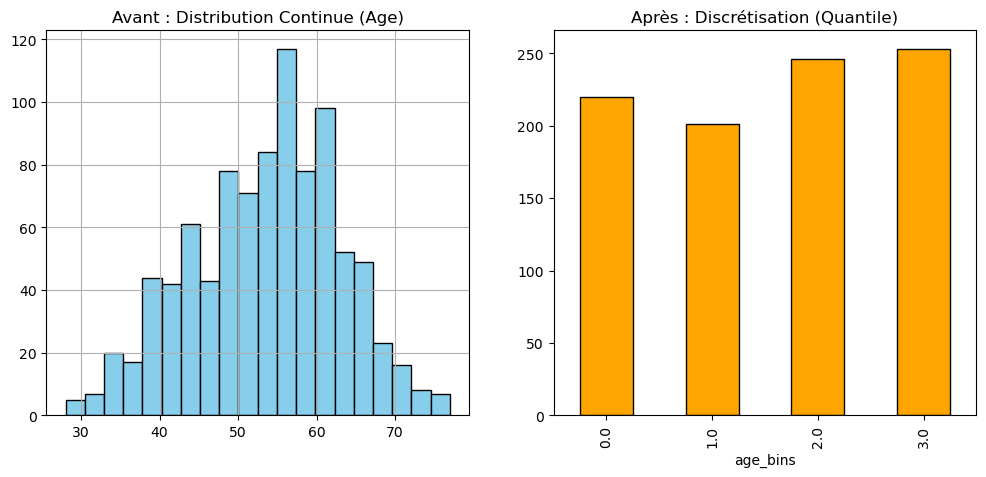

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

# Paramètres demandés : 4 bins, stratégie quantile, encodage ordinal
kbins = KBinsDiscretizer(n_bins=4, strategy='quantile', encode='ordinal')

# Application sur l'âge
df['age_bins'] = kbins.fit_transform(df[['age']])

# Répartition des données
print("Répartition par bin :\n", df['age_bins'].value_counts().sort_index())

# Visualisation Avant/Après
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['age'].hist(ax=ax[0], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title("Avant : Distribution Continue (Age)")

df['age_bins'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='orange', edgecolor='black')
ax[1].set_title("Après : Discrétisation (Quantile)")
plt.show()

## Partie 6 : Normalisation et Standardisation

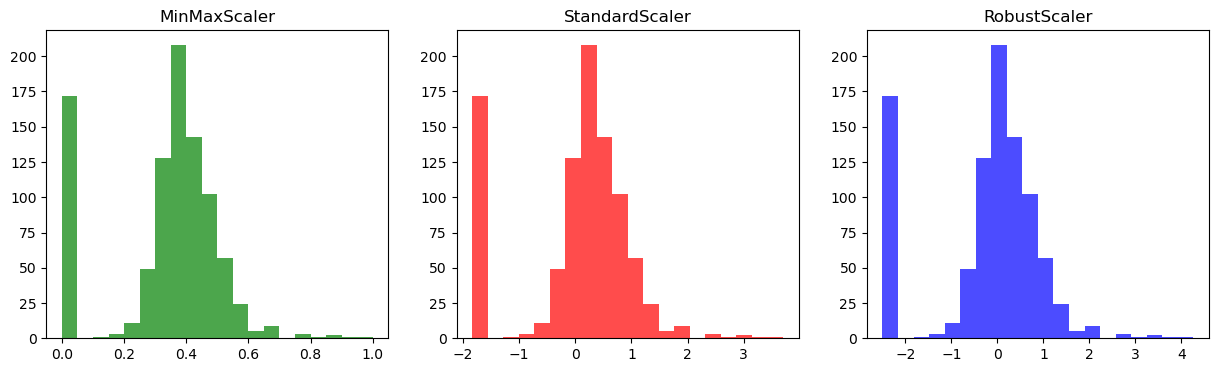

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Sélection d'une variable variable, ex: 'chol' (Cholestérol)
col_to_scale = df[['chol']]

# 1. MinMaxScaler
scaler_minmax = MinMaxScaler()
chol_minmax = scaler_minmax.fit_transform(col_to_scale)

# 2. StandardScaler
scaler_std = StandardScaler()
chol_std = scaler_std.fit_transform(col_to_scale)

# 3. RobustScaler
scaler_robust = RobustScaler()
chol_robust = scaler_robust.fit_transform(col_to_scale)

# Comparaison graphique
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].hist(chol_minmax, bins=20, color='green', alpha=0.7); ax[0].set_title("MinMaxScaler")
ax[1].hist(chol_std, bins=20, color='red', alpha=0.7); ax[1].set_title("StandardScaler")
ax[2].hist(chol_robust, bins=20, color='blue', alpha=0.7); ax[2].set_title("RobustScaler")
plt.show()

## Partie 7 : PowerTransformer

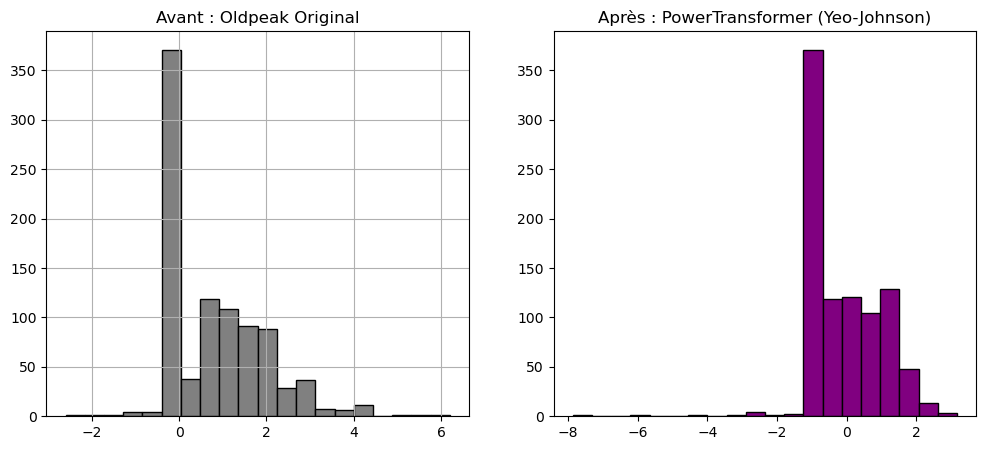

In [12]:
from sklearn.preprocessing import PowerTransformer

# Application sur 'oldpeak' qui est souvent asymétrique
# Method='yeo-johnson' car elle gère les valeurs positives et nulles/négatives
pt = PowerTransformer(method='yeo-johnson')

oldpeak_trans = pt.fit_transform(df[['oldpeak']])

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['oldpeak'].hist(ax=ax[0], bins=20, color='gray', edgecolor='black')
ax[0].set_title("Avant : Oldpeak Original")

ax[1].hist(oldpeak_trans, bins=20, color='purple', edgecolor='black')
ax[1].set_title("Après : PowerTransformer (Yeo-Johnson)")
plt.show()

## Partie 8 : PolynomialFeatures

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Sélection d'une variable numérique, ex: 'oldpeak' (Dépression ST)
# On la transforme en tableau 2D car sklearn l'exige
X_poly_input = df[['oldpeak']]

# 1. Configuration : Degré 2
# include_bias=False pour ne pas ajouter une colonne de 1 (constante) inutile ici
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. Transformation
X_poly_output = poly.fit_transform(X_poly_input)

# Création d'un DataFrame pour visualiser
poly_features_names = poly.get_feature_names_out(['oldpeak'])
df_poly = pd.DataFrame(X_poly_output, columns=poly_features_names)

# 3. Affichage des résultats
print(f"Dimension avant transformation : {X_poly_input.shape}")
print(f"Dimension après transformation : {df_poly.shape}")
print("-" * 30)
print("Nouvelles variables générées :")
print(poly_features_names)
print("-" * 30)
display(df_poly.head())

# Justification du choix (Degré 2) :
# Nous choisissons le degré 2 car il permet de capturer des effets quadratiques (courbure)
# sans complexifier excessivement le modèle. Un degré 3 ou plus risquerait de provoquer
# du sur-apprentissage (overfitting) sur un dataset médical de cette taille (< 1000 lignes)
# et rendrait l'interprétation des coefficients très difficile.

Dimension avant transformation : (920, 1)
Dimension après transformation : (920, 2)
------------------------------
Nouvelles variables générées :
['oldpeak' 'oldpeak^2']
------------------------------


,oldpeak,oldpeak^2
0,2.3,5.29
1,1.5,2.25
2,2.6,6.76
3,3.5,12.25
4,1.4,1.96


## Partie 9 : Pipeline final

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Séparation des features (X) et de la cible (y)
X = df.drop('num', axis=1)  # Assurez-vous que 'num' est la colonne cible
y = df['num']

# Pour une classification binaire (Malade / Pas malade), on peut simplifier y :
# y = (df['num'] > 0).astype(int)

# 2. Définition des colonnes par type
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# 3. Création des transformateurs (branches du pipeline)

# Branche Numérique : Imputation (Médiane) -> Standardisation
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Branche Catégorielle : Imputation (Fréquence) -> Encodage OneHot
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# 4. Combinaison dans le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 5. Pipeline Final : Préprocesseur -> Modèle
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000)
)

# 6. Test du pipeline (Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
model.fit(X_train, y_train)

# Évaluation
score = model.score(X_test, y_test)
print(f"Pipeline construit avec succès.")
print(f"Précision du modèle sur le jeu de test : {score:.2f}")

Pipeline construit avec succès.
Précision du modèle sur le jeu de test : 0.58
